# <center>Assignment 8</center>

<hr>

## <center>NLP Sentiment Analysis</center>

**Name               :** Atharva Ramgirkar  
**Registration Number:** 19BCE0114  
**Submission Date    :** 14 July, 2021  
**Program            :** VIT-AI Industry Certifiation  
**Email              :** atharva.ramgirkar2019@vitstudent.ac.in  

*Other Assignments can be found in the link:* **https://drive.google.com/drive/folders/1QGOLHyZykoj_CroTJu6-YkZWf32JZ-QH?usp=sharing**

## <center>Table of Content</center>
* [Importing Libraries](#1.-Importing-Libraries)  
    * [Initailizing Objects](1.1-Initailizing-Objects)
* [Reading Data](#2.-Reading-Data)
* [Understanding Data](#3.-Understanding-Data)
* [Dropping Unnecessary Columns](#4.-Dropping-Unnecessary-Columns)
* [Dropping Empty Rows](#5.-Dropping-Empty-Rows)
* [Modfying Columns](#6.-Modfying-Columns)
    * [Encoding "points" Column](#6.1-Encoding-"points"-Column)
    * ["country" Column](#6.2-"country"-Column)
    * ["province" Column](#6.3-"province"-Column)
    * ["province" Column](#6.4-"province"-Column)
    * ["variety" Column](#6.5-"variety"-Column)
* [Setting Feature and Target Columns](#7.-Setting-Feature-and-Target-Columns)
* [NLP on Data](#8.-NLP-on-Data)
* [Train Test Split](#9.-Train-Test-Split)
* [Building Model](#10.-Building-Model)
    * [Initializing Model](#10.1-Initializing-Model)
    * [Adding Hidden Layers](#10.2-Adding-Hidden-Layers)
    * [Adding Output Layer](#10.3-Adding-Output-Layer)
* [Compiling the Model](#11.-Compiling-the-Model)
* [Training the Model](#12.-Training-the-Model)
* [Testing the Model](#13.-Testing-the-Model)
* [Model Accurecy](#14.-Model-Accurecy)
* [Single Predictions](#15.-Single-Predictions)

### 1. Importing Libraries

[Back to Top](#Table-of-Content)

In [1]:
import pandas as pd
import numpy as np

# For NLP 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# For Train Test Split
from sklearn.model_selection import train_test_split

# For Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# For handling Missing Values
import missingno as ms
import matplotlib.pyplot as plt

# Model Evaluation 
from sklearn.metrics import accuracy_score

#### 1.1 Initailizing Objects

In [2]:
ps = PorterStemmer()
cv = CountVectorizer(max_features=4000)

### 2. Reading Data

[Back to Top](#Table-of-Content)

In [3]:
df = pd.read_csv("winemag-data-130k-v2.csv")

### 3. Understanding Data

[Back to Top](#Table-of-Content)

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

<AxesSubplot:>

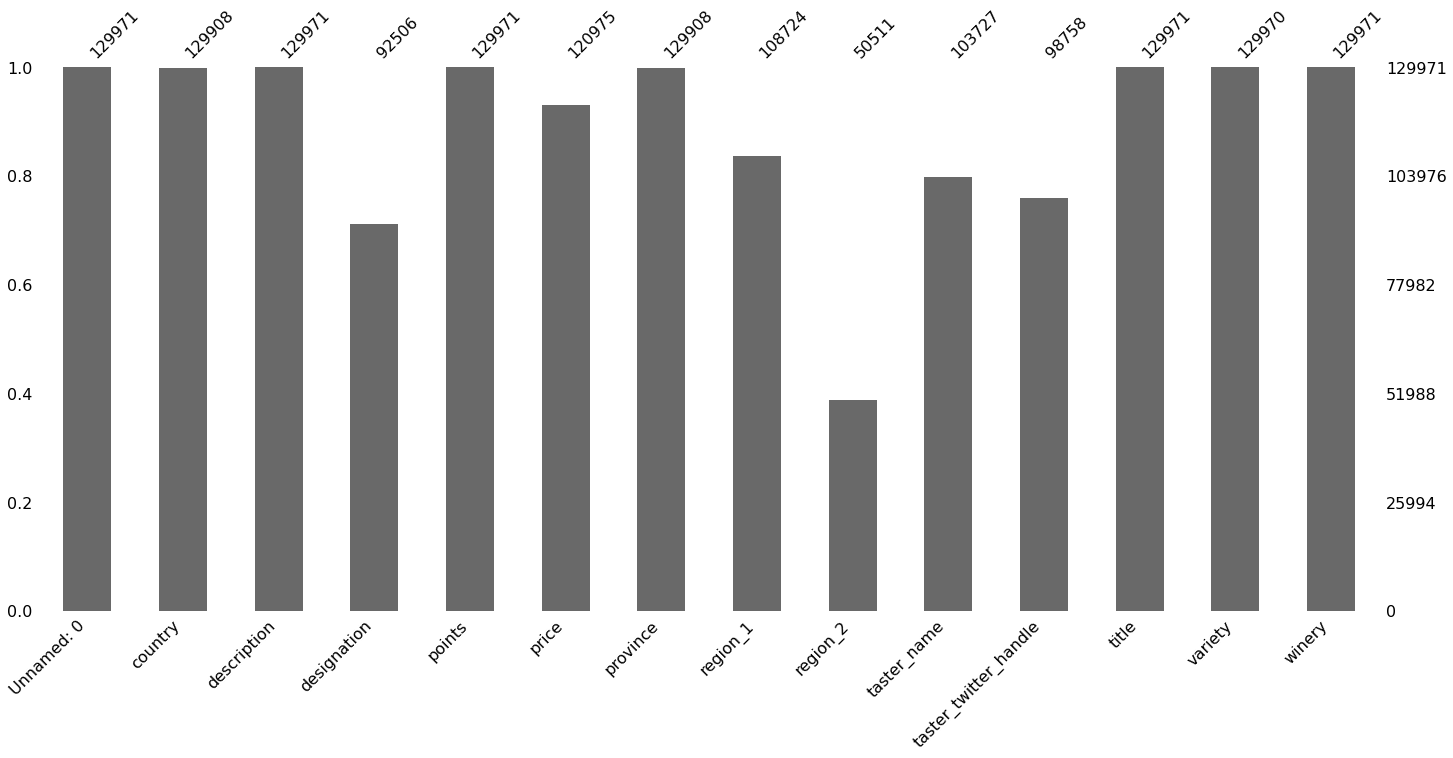

In [7]:
ms.bar(df)

<AxesSubplot:>

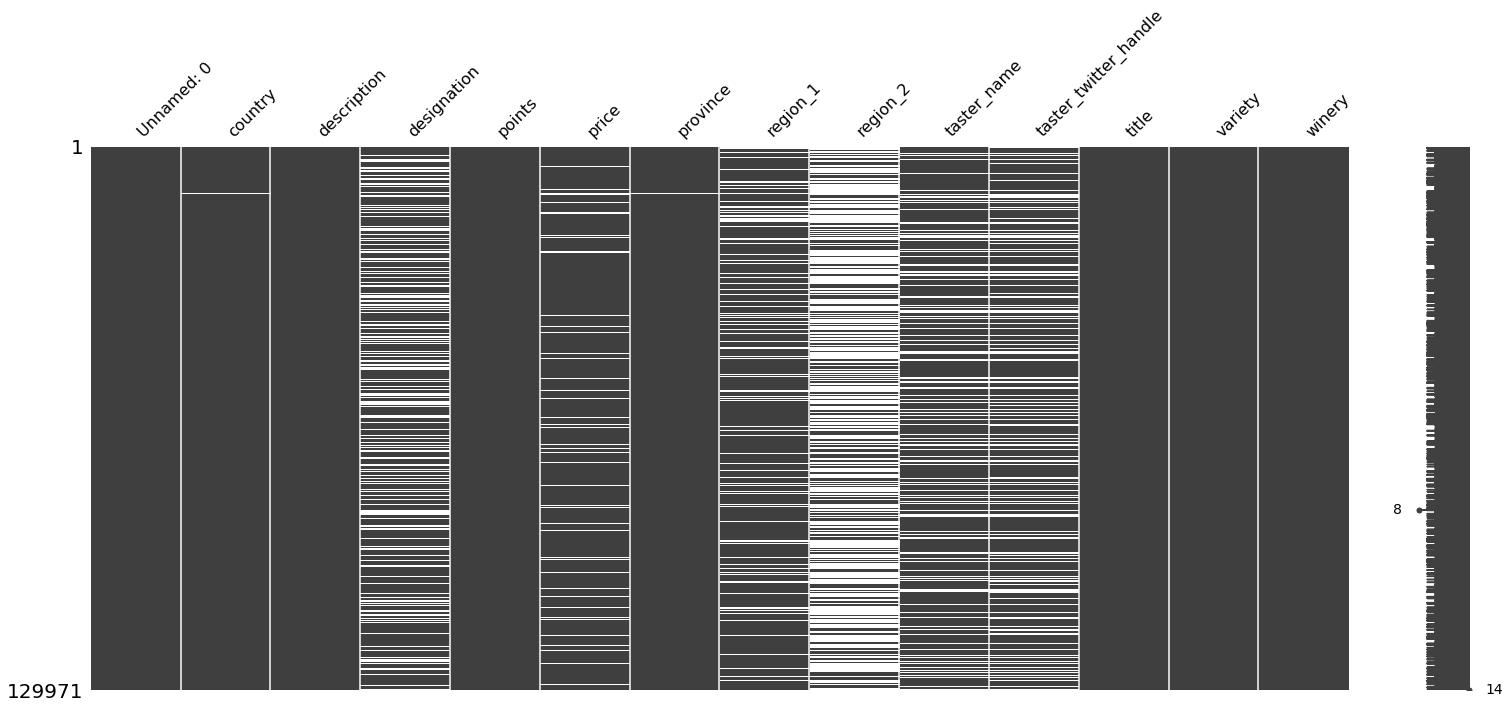

In [8]:
ms.matrix(df)

In [9]:
df.shape

(129971, 14)

<AxesSubplot:>

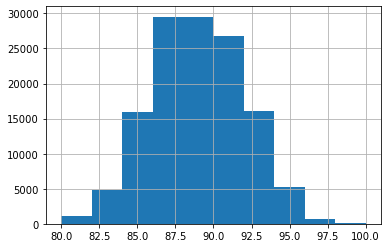

In [10]:
df['points'].hist()

In [11]:
df['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

### 4. Dropping Unnecessary Columns

[Back to Top](#Table-of-Content)

In [12]:
df.drop(['Unnamed: 0',
         'price',
         'taster_twitter_handle',
         'title',
         'designation',
         'region_1',
         'taster_name',
         'region_2'],
        axis=1,
        inplace=True)

### 5. Dropping Empty Rows

[Back to Top](#Table-of-Content)

In [13]:
df = df.dropna()

### 6. Modfying Columns

[Back to Top](#Table-of-Content)

#### 6.1 Encoding "points" Column

In [14]:
df['points'] = np.where(df['points']>90,1,0)

#### 6.2 "country" Column

In [15]:
low_country = list(df['country'].value_counts().index)[12:]

In [16]:
for index, row in df.iterrows():
    if row['country'] in low_country:
        row['country'] = "Other_Countries"
            

#### 6.3 "province" Column

In [17]:
low_pro = list(df['province'].value_counts().index)[40:]

In [18]:
for index, row in df.iterrows():
    if row['province'] in low_pro:
        row['province'] = "Other_Provinces"

In [19]:
df['province'] = np.where(df['province']=="Other","Other_Provinces",df['province'])

#### 6.4 "province" Column

In [20]:
good_win = list(df['winery'].value_counts().index)[:2000]

In [21]:
for index, row in df.iterrows():
    if row['winery'] in good_win:
        row['winery'] = "Good_Winery"
    else:
        row['winery'] = "Bad_Winery"

#### 6.5 "variety" Column

In [22]:
low_variety = list(df['variety'].value_counts().index)[30:]

In [23]:
for index, row in df.iterrows():
    if row['variety'] in low_variety:
        row['variety'] = "Other_Variety"

### 7. Setting Feature and Target Columns

[Back to Top](#Table-of-Content)

In [24]:
y = df['points'].values

In [25]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
X=df.drop('points',axis=1)

In [28]:
X

,country,description,province,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Sicily & Sardinia,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Oregon,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,Oregon,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Alsace,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",Alsace,Pinot Gris,Domaine Marcel Deiss


In [29]:
df.reset_index(drop=True,inplace=True)

In [30]:
df.shape

(129907, 6)

In [31]:
df.tail()

,country,description,points,province,variety,winery
129902,Germany,Notes of honeysuckle and cantaloupe sweeten th...,0,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129903,US,Citation is given as much as a decade of bottl...,0,Oregon,Pinot Noir,Citation
129904,France,Well-drained gravel soil gives this wine its c...,0,Alsace,Gewürztraminer,Domaine Gresser
129905,France,"A dry style of Pinot Gris, this is crisp with ...",0,Alsace,Pinot Gris,Domaine Marcel Deiss
129906,France,"Big, rich and off-dry, this is powered by inte...",0,Alsace,Gewürztraminer,Domaine Schoffit


### 8. NLP on Data

[Back to Top](#Table-of-Content)

In [32]:
df['description'][129906]

'Big, rich and off-dry, this is powered by intense spiciness and rounded texture. Lychees dominate the fruit profile, giving an opulent feel to the aftertaste. Drink now.'

In [33]:
data = []
for i in range(0,129906):
    rev = df['description'][i]
    
    # Removing Special Characters
    rev = re.sub('[^a-zA-Z]'," ",rev)
    
    # Converting to Lower Case
    rev = rev.lower()
    
    # Spliting Sentences to List of Words
    rev = rev.split()
    
    # Stemming and Stop Word Removal
    rev = [ps.stem(word) for word in rev if not word in set(stopwords.words('english'))]
    
    # Re-Forming Sentence
    rev = " ".join(rev)
    
    # Appending to Corpus
    data.append(rev)

In [34]:
len(data)

129906

In [35]:
data[0:5]

['aroma includ tropic fruit broom brimston dri herb palat overli express offer unripen appl citru dri sage alongsid brisk acid',
 'ripe fruiti wine smooth still structur firm tannin fill juici red berri fruit freshen acid alreadi drinkabl although certainli better',
 'tart snappi flavor lime flesh rind domin green pineappl poke crisp acid underscor flavor wine stainless steel ferment',
 'pineappl rind lemon pith orang blossom start aroma palat bit opul note honey drizzl guava mango give way slightli astring semidri finish',
 'much like regular bottl come across rather rough tannic rustic earthi herbal characterist nonetheless think pleasantli unfussi countri wine good companion hearti winter stew']

In [36]:
for i in range(129907):
    try:
        data[i] = data[i] +" "+df.loc[i,('country')]+" "+df.loc[i,('province')]+" "+df.loc[i,('variety')]+" "+df.loc[i,('winery')] 
    except:
        pass

In [37]:
data[:5]

['aroma includ tropic fruit broom brimston dri herb palat overli express offer unripen appl citru dri sage alongsid brisk acid Italy Sicily & Sardinia White Blend Nicosia',
 'ripe fruiti wine smooth still structur firm tannin fill juici red berri fruit freshen acid alreadi drinkabl although certainli better Portugal Douro Portuguese Red Quinta dos Avidagos',
 'tart snappi flavor lime flesh rind domin green pineappl poke crisp acid underscor flavor wine stainless steel ferment US Oregon Pinot Gris Rainstorm',
 'pineappl rind lemon pith orang blossom start aroma palat bit opul note honey drizzl guava mango give way slightli astring semidri finish US Michigan Riesling St. Julian',
 'much like regular bottl come across rather rough tannic rustic earthi herbal characterist nonetheless think pleasantli unfussi countri wine good companion hearti winter stew US Oregon Pinot Noir Sweet Cheeks']

In [38]:
X = cv.fit_transform(data).toarray()

### 9. Train Test Split

[Back to Top](#Table-of-Content)

In [41]:
X.shape

(129906, 4000)

In [48]:
y = y[:129906]

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=114,stratify=y)

### 10. Building Model

[Back to Top](#Table-of-Content)

#### 10.1 Initializing Model

In [50]:
model = Sequential()

#### 10.2 Adding Hidden Layers

In [51]:
model.add(Dense(units = 4000,
                kernel_initializer="random_uniform",
                activation="relu"))

model.add(Dense(units = 3000,
                kernel_initializer="random_uniform",
                activation="relu"))

model.add(Dense(units = 1000,
                kernel_initializer="random_uniform",
                activation="relu"))

#### 10.3 Adding Output Layer

In [52]:
model.add(Dense(units = 1,
                kernel_initializer="random_uniform",
                activation="sigmoid"))

### 11. Compiling the Model

[Back to Top](#Table-of-Content)

In [53]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

### 12. Training the Model

[Back to Top](#Table-of-Content)

In [54]:
model.fit(X_train,y_train,epochs=1)

2842/2842 [==============================] - 647s 228ms/step - loss: 0.3334 - accuracy: 0.8511


### 13. Testing the Model

[Back to Top](#Table-of-Content)

In [55]:
pred = model.predict(X_test)

In [56]:
pred = pred>0.5

### 14. Model Accurecy

[Back to Top](#Table-of-Content)

In [57]:
accuracy_score(y_test, pred)

0.8661603202299086

### 15. Single Predictions

[Back to Top](#Table-of-Content)

In [58]:
model.predict(cv.transform(["Italy Bordeaux-style Red Blend Bad_Winery"]))

array([[0.04960445]], dtype=float32)

In [59]:
model.predict(cv.transform(["Wine India bad"]))

array([[0.08979273]], dtype=float32)

In [60]:
model.predict(cv.transform(["Wine Italy Best"]))

array([[0.15743548]], dtype=float32)

<hr>